<h1 style="text-align: center;">Machine Learning Exercise 7 - KMeans</h1>
<h2 style="text-align: center;">Ajay Badrinath</h2>
<h3 style="text-align: center;">21011102020</h3>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

### K-Means From Scratch

In [37]:
data=pd.read_csv(r'D:\data.csv')

In [38]:
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
class KMeans:
    def __init__(self,data_n,n_clusters=5):
        self.data=data_n.values
        self.n_clusters=n_clusters

        self.create_centroid()
        print(self.centroid)
        #self._run()
        
    def dist(self,centroid,dt):
        return np.sqrt(np.sum((centroid-dt)**2))
    def create_centroid(self):
        self.centroid= [[i,np.random.uniform(self.data.min(),self.data.max()),np.random.uniform(self.data.min(),self.data.max())] for i in range(self.n_clusters)]
    def _run(self):
        previous_centroid=None
        current_centroid=self.centroid
        points={}
        for i in range(len(self.centroid)):
            points.update({self.centroid[i][0]:[]})
        while(previous_centroid!=current_centroid):

            for k in range(len(self.data)):
                min_dist=np.inf
                centroid_k=None
                for i in range(len(current_centroid)):
                    tmp=self.dist(current_centroid[i][1:],self.data[k])
                    if(tmp<min_dist):
                        min_dist=tmp
                        centroid_k=i
                #print(centroid_k)
                points[current_centroid[centroid_k][0]].append(self.data[k])
            previous_centroid=current_centroid
            print(len(points[0]),len(points[1]),len(points[2]))
            for i in range(len(current_centroid)):
                avg=0
                avg=sum(points[i])/len(points[i])
                print("avg",avg)
                current_centroid[i][1:]=avg

            dup=points
            points={current_centroid[i][0]:dup[current_centroid[i][0]] for i in range(len(current_centroid))}
        
        
        self.clusters=points
        l=[]
        for i in range(len( self.data)):
            for j in range(self.n_clusters):
                #tmp=
                for k in points[j]:
                    if((self.data[i]==k).all()):
                        l.append(j)
                        break
                
        self.KMeans_labels=l
        print(l)
    def  silhouette_score(self):
        return silhouette_score(self.data, self.KMeans_labels, metric='euclidean')
     


    

In [49]:
data=data[['Annual Income','Spending Score']]

In [83]:
z=KMeans(data[['Annual Income','Spending Score']],n_clusters=3)
z._run()






[[0, 124.52879949507005, 11.183561099111675], [1, 33.4127386685388, 40.60764305226854], [2, 134.1543940297911, 74.45315067737035]]
30 142 28
avg [90.63333333 15.96666667]
avg [48.00704225 50.85915493]
avg [92.         83.53571429]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2]


In [84]:
z.silhouette_score()

0.4027896475824334

In [68]:
z.KMeans_labels

[1, 1, 1, 1, 1, 1]

In [22]:
data[['Annual Income','Spending Score']]


,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### KMeans Using skLearn


<AxesSubplot:xlabel='Spending Score', ylabel='Annual Income'>

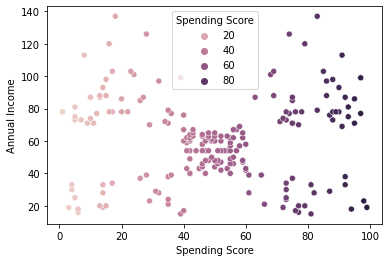

In [27]:
sns.scatterplot(data = data, x = 'Spending Score', y = 'Annual Income', hue = 'Spending Score')

## Performing Scaling  (Unnecessary in this case but anyways....)

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Annual Income','Spending Score']],data['Gender'])
x_train_n=preprocessing.normalize(x_train)
x_test_n=preprocessing.normalize(x_test)

In [27]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8,random_state=0)

In [29]:
kmeans.fit(x_train_n)

KMeans(random_state=0)

<AxesSubplot:xlabel='Spending Score', ylabel='Annual Income'>

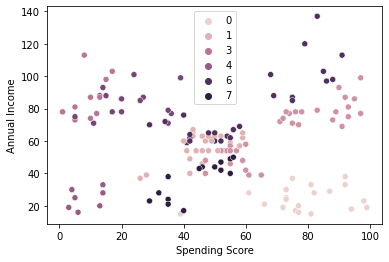

In [30]:
sns.scatterplot(data = x_train, x = 'Spending Score', y = 'Annual Income', hue = kmeans.labels_)

In [31]:
kmeans.labels_

array([1, 5, 2, 2, 3, 2, 1, 6, 1, 3, 2, 1, 6, 0, 2, 6, 0, 1, 1, 3, 0, 6,
       2, 4, 2, 6, 5, 2, 2, 5, 0, 1, 6, 0, 7, 6, 0, 0, 1, 5, 5, 6, 3, 2,
       2, 5, 2, 1, 7, 3, 6, 2, 6, 3, 4, 1, 3, 2, 2, 1, 7, 2, 2, 2, 5, 4,
       3, 2, 2, 1, 6, 6, 7, 2, 6, 1, 5, 0, 2, 0, 0, 0, 0, 0, 2, 4, 6, 7,
       2, 6, 6, 1, 3, 5, 1, 3, 0, 1, 2, 5, 1, 1, 0, 1, 7, 1, 4, 6, 6, 5,
       7, 1, 2, 1, 6, 5, 7, 6, 2, 6, 7, 6, 6, 7, 1, 6, 6, 1, 0, 2, 5, 0,
       2, 0, 2, 7, 0, 5, 5, 2, 7, 0, 6, 7, 4, 3, 1, 2, 4, 7])

In [32]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train_n, kmeans.labels_, metric='euclidean')

0.40563594215217225

In [33]:
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data[[ 'Annual Income', 'Spending Score']].values)
    wcss.append(kmeans.inertia_)


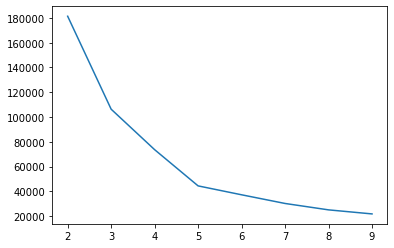

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(2,10),wcss)

### Interpretation 

Therefore the sklearn implementation needed 5 clusters to explain the data but in my from the scratch implementation 3 clusters is enough for achieving a high silhouette score However There is a caveat of running into zero division error once we reach >6 clusters in my implementation as sometimes some data is biased towards one cluster... 
Plus Clusters By themselves do not mean anything Unless we specify the dimension Here 2d that explains the relation between Annual Income And Spending Score!